In [1]:
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#for polynomial eq import the below statement
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr

In [ ]:
#senti = np.arange(10,100,10).reshape((-1,3))
#stock = np.arange(10,100,5).reshape((-1,6))

In [3]:
data_tweets = pd.read_csv('tweets_data_0121_0205.csv')
pos = np.array(data_tweets['Positives'])
neg = np.array(data_tweets['Negatives'])
neu = np.array(data_tweets['Neutrals'])
tweets_array=np.array([])
for i in range(len(pos)):
    tweets_array = np.append(tweets_array , pos[i])
    tweets_array = np.append(tweets_array , neg[i])
    tweets_array = np.append(tweets_array , neu[i])
    
tweets_array = tweets_array.reshape((-1,3))
tweets_array = tweets_array.astype(int)
tweets_array


array([[ 25,  11,  45],
       [ 25,  16,  69],
       [ 16,  14,  87],
       [ 44,  21, 135],
       [ 43,  15, 132],
       [ 40,  23, 111],
       [ 37,  12,  81],
       [ 10,   7,  20],
       [  9,   7,  23],
       [  9,   5,  29],
       [ 11,   5,  25],
       [ 16,  12,  25],
       [ 16,   7,  37],
       [ 12,   6,  31],
       [ 11,  13,  37],
       [ 10,   6,  25]])

In [4]:
data_stocks = pd.read_csv('BP.csv')
print(data_stocks)
df = data_stocks.drop(columns=['Date','Volume'])
df=df.to_numpy()
print(df)

          Date   Open   High    Low  Close    Volume
0   2022-01-21  30.85  31.08  30.55  30.71  17472600
1   2022-01-24  29.40  29.99  28.89  29.98  20993700
2   2022-01-25  30.25  31.48  29.85  31.40  17655000
3   2022-01-26  32.01  32.13  31.24  31.50  16620000
4   2022-01-27  32.02  32.15  31.14  31.53  14698700
5   2022-01-28  31.05  31.35  30.65  31.07  14609200
6   2022-01-31  31.12  31.14  30.75  30.92  10179000
7   2022-02-01  31.20  31.89  31.07  31.76  15409100
8   2022-02-02  31.80  32.03  31.62  31.96  11775200
9   2022-02-03  32.07  32.34  31.68  32.15  13173100
10  2022-02-04  32.72  33.19  32.69  32.88  16932600
[[30.85 31.08 30.55 30.71]
 [29.4  29.99 28.89 29.98]
 [30.25 31.48 29.85 31.4 ]
 [32.01 32.13 31.24 31.5 ]
 [32.02 32.15 31.14 31.53]
 [31.05 31.35 30.65 31.07]
 [31.12 31.14 30.75 30.92]
 [31.2  31.89 31.07 31.76]
 [31.8  32.03 31.62 31.96]
 [32.07 32.34 31.68 32.15]
 [32.72 33.19 32.69 32.88]]


In [5]:
'''
00: 21.Jan
01: 24.Jan , Monday
02: 25.Jan
03: 26.Jan
04: 27.Jan
05: 28.Jan
06: 31.Jan , Monday
07: 01.Feb
08: 02.Feb
09: 03.Feb
10: 04.Feb

'''


senti = np.array(tweets_array)
stock=df


senti[3]=senti[3]+senti[1]+senti[2]
senti[10]=senti[10]+senti[8]+senti[9]

senti=np.delete(senti, 1,0)
senti=np.delete(senti, 1,0)
senti=np.delete(senti, 6,0)
senti=np.delete(senti, 6,0)
senti=np.delete(senti, 11,0)


print(senti)
print('-----------------')
print(stock)
print('-----------------')
print("Sentiment length: " , len(senti))
print("Stock length: " , len(stock))


[[ 25  11  45]
 [ 85  51 291]
 [ 43  15 132]
 [ 40  23 111]
 [ 37  12  81]
 [ 10   7  20]
 [ 29  17  77]
 [ 16  12  25]
 [ 16   7  37]
 [ 12   6  31]
 [ 11  13  37]]
-----------------
[[30.85 31.08 30.55 30.71]
 [29.4  29.99 28.89 29.98]
 [30.25 31.48 29.85 31.4 ]
 [32.01 32.13 31.24 31.5 ]
 [32.02 32.15 31.14 31.53]
 [31.05 31.35 30.65 31.07]
 [31.12 31.14 30.75 30.92]
 [31.2  31.89 31.07 31.76]
 [31.8  32.03 31.62 31.96]
 [32.07 32.34 31.68 32.15]
 [32.72 33.19 32.69 32.88]]
-----------------
Sentiment length:  11
Stock length:  11


# mood vs change

In [6]:
#add sentiment change to sentiment


emot = senti[:,0]-senti[:,1]
print(emot)
#emotion = emot.reshape(-1,1)
#print(emotion)
senti = np.insert(senti,3,emot,axis=1)
print(senti)



[14 34 28 17 25  3 12  4  9  6 -2]
[[ 25  11  45  14]
 [ 85  51 291  34]
 [ 43  15 132  28]
 [ 40  23 111  17]
 [ 37  12  81  25]
 [ 10   7  20   3]
 [ 29  17  77  12]
 [ 16  12  25   4]
 [ 16   7  37   9]
 [ 12   6  31   6]
 [ 11  13  37  -2]]


In [7]:
#add growth/loss axis in stocks

grow = stock[:,3]-stock[:,0]
print(grow)
stock = np.insert(stock,4,grow,axis=1)
#print(stock)
np.set_printoptions(suppress=True)
print(stock)

[-0.14  0.58  1.15 -0.51 -0.49  0.02 -0.2   0.56  0.16  0.08  0.16]
[[30.85 31.08 30.55 30.71 -0.14]
 [29.4  29.99 28.89 29.98  0.58]
 [30.25 31.48 29.85 31.4   1.15]
 [32.01 32.13 31.24 31.5  -0.51]
 [32.02 32.15 31.14 31.53 -0.49]
 [31.05 31.35 30.65 31.07  0.02]
 [31.12 31.14 30.75 30.92 -0.2 ]
 [31.2  31.89 31.07 31.76  0.56]
 [31.8  32.03 31.62 31.96  0.16]
 [32.07 32.34 31.68 32.15  0.08]
 [32.72 33.19 32.69 32.88  0.16]]


In [8]:
"""
y = np.array([])
for i in range(len(senti)):
    mean = senti[i,1] / (senti[i,0]+senti[i,1])
    y=np.append(y,mean)


x = ['21','24M','25','26','27','28','31M','1','2','3','4']
print(x)
print(y)
"""

# ASSIGN the axis values for x and y here

#print(senti)
#print(stock)

x = senti[:,3]
y = stock[:,4]
p = x.argsort()
x = x[p]
y = y[p]
print(x)
print(y)

[-2  3  4  6  9 12 14 17 25 28 34]
[ 0.16  0.02  0.56  0.08  0.16 -0.2  -0.14 -0.51 -0.49  1.15  0.58]


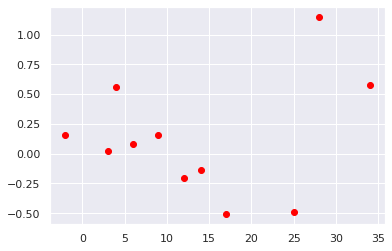

In [34]:
plt.scatter(x,y,color='red')
plt.show()

In [10]:
covar = cov(x,y)
print(covar)

[[129.45454545   1.18581818]
 [  1.18581818   0.24196727]]


In [11]:
corr,_ = pearsonr(x,y)
print('Pearson coeff:',corr)

Pearson coeff: 0.21187569404151524


 from here we start fitting the data in the equation - namely linear regression with 1 variable


In [12]:
x_ = x.reshape((-1,1))
print(x_)
model = LinearRegression().fit(x_,y)

[[-2]
 [ 3]
 [ 4]
 [ 6]
 [ 9]
 [12]
 [14]
 [17]
 [25]
 [28]
 [34]]


In [13]:
rsq = model.score(x_,y)
print('Coeff of covar:',rsq)
print('Intercept:',model.intercept_)
print('Slope:',model.coef_)

Coeff of covar: 0.04489130972557409
Intercept: -0.0003651685393247367
Slope: [0.00916011]


In [14]:
y_pred = model.predict(x_)
print('predicted response:',y_pred, sep='\n')

predicted response:
[-0.01868539  0.02711517  0.03627528  0.05459551  0.08207584  0.10955618
  0.1278764   0.15535674  0.22863764  0.25611798  0.31107865]


In [33]:
arr = y - y_pred
print(arr)

[ 0.17868539 -0.00711517  0.52372472  0.02540449  0.07792416 -0.30955618
 -0.2678764  -0.66535674 -0.71863764  0.89388202  0.26892135]


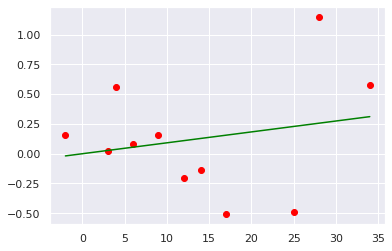

In [15]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='green')
#plt.title("Linear eq in 1 variable")
#plt.xlabel("Difference in twitter mood")
#plt.ylabel("Change in stock value")
plt.show()

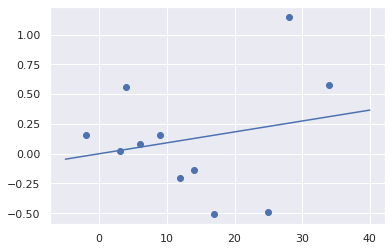

In [16]:
modeld = np.poly1d(np.polyfit(x,y,1))
polylined = np.linspace(-5, 40, 30)
plt.scatter(x,y)
plt.plot(polylined,modeld(polylined))
plt.show()

we see that linear equation for one variable does not give the correct answers, it is too rigid. high bias observed. Low value of R^2 observed. so do quadratic equation

In [17]:
xq = PolynomialFeatures(degree=2).fit_transform(x_)
print(xq)

[[   1.   -2.    4.]
 [   1.    3.    9.]
 [   1.    4.   16.]
 [   1.    6.   36.]
 [   1.    9.   81.]
 [   1.   12.  144.]
 [   1.   14.  196.]
 [   1.   17.  289.]
 [   1.   25.  625.]
 [   1.   28.  784.]
 [   1.   34. 1156.]]


In [18]:
modelq = LinearRegression().fit(xq,y)

In [19]:
rsqq = modelq.score(xq,y)
print('Coeff of covar:',rsqq)
print('Slope:',modelq.coef_)
print('Intercept:',modelq.intercept_)

Coeff of covar: 0.3071788620771656
Slope: [ 0.         -0.06155864  0.00219286]
Intercept: 0.2981499743044832


In [20]:
y_predq = modelq.predict(xq)
print('predicted response:', y_predq, sep='\n')

predicted response:
[ 0.43003869  0.13320978  0.08700114  0.00774102 -0.07825628 -0.12478213
 -0.13387079 -0.1146109   0.12972033  0.29370886  0.74010027]


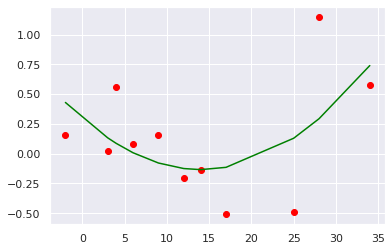

In [21]:
plt.scatter(x,y,color='red')
plt.plot(x,y_predq,color='green')
#plt.plot(x,y_predq,'ro-')

plt.show()

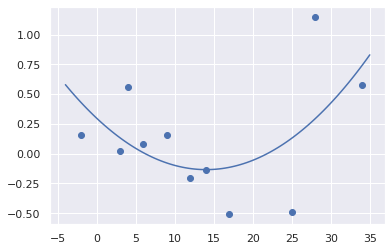

In [22]:
#axis are x and y
#plot the quadratic equation
modeldum = np.poly1d(np.polyfit(x,y,2))
polyline = np.linspace(-4,35,100)
plt.scatter(x,y)
plt.plot(polyline,modeldum(polyline))
plt.show()

cubic polynomial equation from now

[[    1.    -2.     4.    -8.]
 [    1.     3.     9.    27.]
 [    1.     4.    16.    64.]
 [    1.     6.    36.   216.]
 [    1.     9.    81.   729.]
 [    1.    12.   144.  1728.]
 [    1.    14.   196.  2744.]
 [    1.    17.   289.  4913.]
 [    1.    25.   625. 15625.]
 [    1.    28.   784. 21952.]
 [    1.    34.  1156. 39304.]]
Coeff of covar: 0.33484539604469565
Slope: [ 0.         -0.0259364  -0.00110745  0.0000704 ]
Intercept: 0.2558120320298825
predicted response:
[ 0.30269185  0.16993656  0.13885277  0.07553163 -0.01599811 -0.09324803
 -0.13118283 -0.15928944  0.01523024  0.20675093  0.86072442]


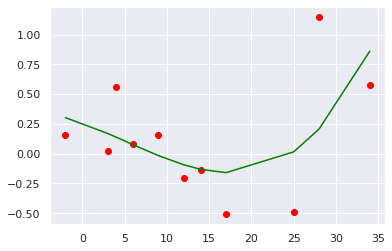

In [23]:
xc = PolynomialFeatures(degree=3).fit_transform(x_)
print(xc)

modelc = LinearRegression().fit(xc,y)

rsqc = modelc.score(xc,y)
print('Coeff of covar:',rsqc)
print('Slope:',modelc.coef_)
print('Intercept:',modelc.intercept_)

y_predc = modelc.predict(xc)
print('predicted response:', y_predc, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_predc,color='green')
#plt.plot(x,y_predq,'ro-')
plt.show()

degree = 4

[[      1.      -2.       4.      -8.      16.]
 [      1.       3.       9.      27.      81.]
 [      1.       4.      16.      64.     256.]
 [      1.       6.      36.     216.    1296.]
 [      1.       9.      81.     729.    6561.]
 [      1.      12.     144.    1728.   20736.]
 [      1.      14.     196.    2744.   38416.]
 [      1.      17.     289.    4913.   83521.]
 [      1.      25.     625.   15625.  390625.]
 [      1.      28.     784.   21952.  614656.]
 [      1.      34.    1156.   39304. 1336336.]]
Coeff of covar: 0.5059347883896919
Slope: [ 0.          0.07711832 -0.02226327  0.00120121 -0.00001776]
Intercept: 0.3237546379086421
predicted response:
[ 0.07057112  0.38573465  0.34834756  0.22143627 -0.02632241 -0.24924215
 -0.34620061 -0.3808121   0.16993523  0.48346848  0.69308393]


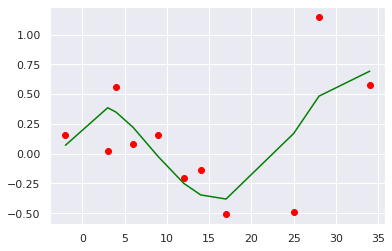

In [24]:
x4 = PolynomialFeatures(degree=4).fit_transform(x_)
print(x4)

model4 = LinearRegression().fit(x4,y)

rsq4 = model4.score(x4,y)
print('Coeff of covar:',rsq4)
print('Slope:',model4.coef_)
print('Intercept:',model4.intercept_)

y_pred4 = model4.predict(x4)
print('predicted response:', y_pred4, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_pred4,color='green')
#plt.plot(x,y_predq,'ro-')
plt.show()

degree = 5

[[       1.       -2.        4.       -8.       16.      -32.]
 [       1.        3.        9.       27.       81.      243.]
 [       1.        4.       16.       64.      256.     1024.]
 [       1.        6.       36.      216.     1296.     7776.]
 [       1.        9.       81.      729.     6561.    59049.]
 [       1.       12.      144.     1728.    20736.   248832.]
 [       1.       14.      196.     2744.    38416.   537824.]
 [       1.       17.      289.     4913.    83521.  1419857.]
 [       1.       25.      625.    15625.   390625.  9765625.]
 [       1.       28.      784.    21952.   614656. 17210368.]
 [       1.       34.     1156.    39304.  1336336. 45435424.]]
Coeff of covar: 0.7388595951876036
Slope: [ 0.         -0.02189757  0.04034245 -0.00572696  0.00025312 -0.00000349]
Intercept: -0.06711217590818963
predicted response:
[ 0.18802998  0.0953051   0.18548123  0.3177491   0.28350503 -0.03535495
 -0.33205632 -0.72505229 -0.04789471  0.82388364  0.61640418]


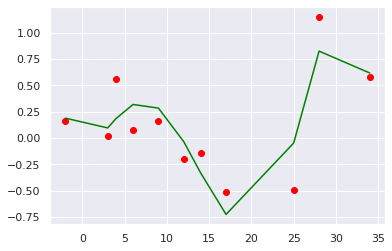

In [25]:
x5 = PolynomialFeatures(degree=5).fit_transform(x_)
print(x5)

model5 = LinearRegression().fit(x5,y)

rsq5 = model5.score(x5,y)
print('Coeff of covar:',rsq5)
print('Slope:',model5.coef_)
print('Intercept:',model5.intercept_)

y_pred5 = model5.predict(x5)
print('predicted response:', y_pred5, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_pred5,color='green')
#plt.plot(x,y_predq,'ro-')
plt.show()

[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00
   1.60000000e+01 -3.20000000e+01  6.40000000e+01]
 [ 1.00000000e+00  3.00000000e+00  9.00000000e+00  2.70000000e+01
   8.10000000e+01  2.43000000e+02  7.29000000e+02]
 [ 1.00000000e+00  4.00000000e+00  1.60000000e+01  6.40000000e+01
   2.56000000e+02  1.02400000e+03  4.09600000e+03]
 [ 1.00000000e+00  6.00000000e+00  3.60000000e+01  2.16000000e+02
   1.29600000e+03  7.77600000e+03  4.66560000e+04]
 [ 1.00000000e+00  9.00000000e+00  8.10000000e+01  7.29000000e+02
   6.56100000e+03  5.90490000e+04  5.31441000e+05]
 [ 1.00000000e+00  1.20000000e+01  1.44000000e+02  1.72800000e+03
   2.07360000e+04  2.48832000e+05  2.98598400e+06]
 [ 1.00000000e+00  1.40000000e+01  1.96000000e+02  2.74400000e+03
   3.84160000e+04  5.37824000e+05  7.52953600e+06]
 [ 1.00000000e+00  1.70000000e+01  2.89000000e+02  4.91300000e+03
   8.35210000e+04  1.41985700e+06  2.41375690e+07]
 [ 1.00000000e+00  2.50000000e+01  6.25000000e+02  1.56250000e+0

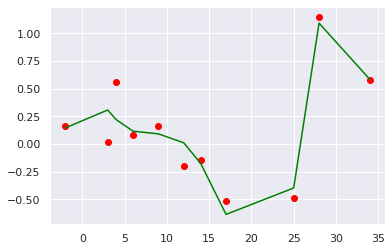

In [26]:
x6 = PolynomialFeatures(degree=6).fit_transform(x_)
print(x6)

model6 = LinearRegression().fit(x6,y)

rsq6 = model6.score(x6,y)
print('Coeff of covar:',rsq6)
print('Slope:',model6.coef_)
print('Intercept:',model6.intercept_)

y_pred6 = model6.predict(x6)
print('predicted response:', y_pred6, sep='\n')

plt.scatter(x,y,color='red')
plt.plot(x,y_pred6,color='green')
#plt.plot(x,y_predq,'ro-')
plt.show()

In [2]:
#put predictive models of all degrees 1 to 6 in one single graph

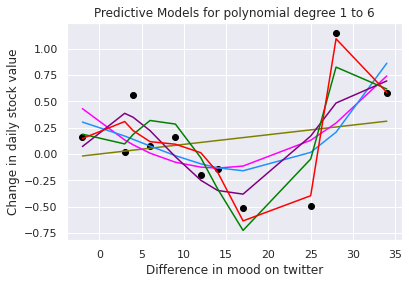

In [27]:
plt.scatter(x,y,color='black')
plt.plot(x,y_pred,color='olive')
plt.plot(x,y_predq,color='fuchsia')
plt.plot(x,y_predc,color='dodgerblue')
plt.plot(x,y_pred4,color='purple')
plt.plot(x,y_pred5,color='green')
plt.plot(x,y_pred6,color='red')
plt.title("Predictive Models for polynomial degree 1 to 6")
plt.xlabel("Difference in mood on twitter")
plt.ylabel("Change in daily stock value")
plt.show()